In [220]:
import sys
sys.path.append('../../')
from search import search_local_distance
import numpy as np
from tools.tools import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Seeing how mismatched exponential density is, try spherical density. Define parammeters. All units in kpc.

In [221]:
d_pixel = 0.001
d_max = 6
d_min = 0
bins = int((d_max - d_min)/d_pixel)
epsilon = 0.2
bins_close = int((epsilon - d_min)/d_pixel)

Get gaia catalogue distance and distance error

In [234]:
samples = search_local.get_entire_catalogue()
dist, dist_err = samples.T

ValueError: too many values to unpack (expected 2)

Change the data of gaia rv to just storing distance. Get stars within epsilon kpc around sun

In [223]:
dist_coord = np.sqrt((R-8.300)**2 + (z - 0.027)**2)
mask = dist_coord < epsilon
dist_close = dist_coord[mask]

Graph 1D histogram for distribution of distance for all of gaia catalogue

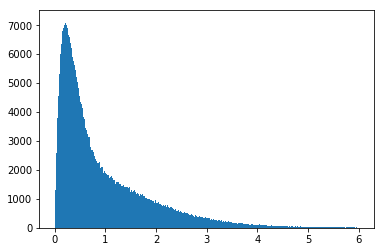

In [224]:
histogram_gaia, edges, patches = plt.hist(dist_coord, bins = bins_d, range = (d_min, d_max))

Graph 1D histogram for distribution of distance for all stars in epsilon region

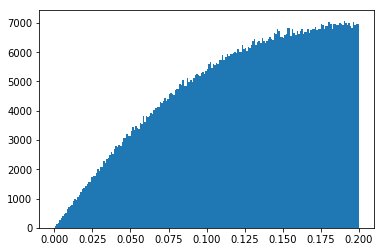

In [225]:
histogram_close, edges_close, patches_close = plt.hist(dist_close, bins = bins_close)

Define a function that get the gaia spherical number density function from histogram result

In [226]:
def n_gaia(d, histogram):
    d_index = ((d-d_min)/d_pixel).astype(int)-1
    result = []
    for i in range(np.size(d)):
        result.append(histogram[d_index[i]])
    return np.array(result)

Define the true sperhical number density function

In [227]:
def n(d, n_0):
    return n_0*4*(np.pi)*(d**2)

Curve fit spherical density with stars in epsilon region.

In [228]:
popt, pcov = curve_fit(n_spherical, dist_close, n_gaia(dist_close, histogram_close))
n_0 = popt[0]
std_n_0 = pcov[0][0]
print("optimized n_0 =", n_0)
print("standard deviation of n_0 =", std_n_0)

optimized n_0 = 20332.546502068915
standard deviation of n_0 = 68.1598589963788


Plot theoretical prediction over histogram in epsilon neighborhood.

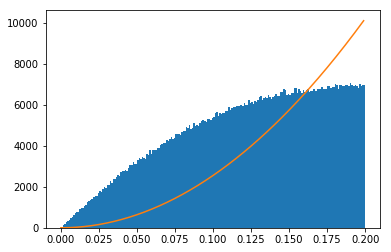

In [229]:
plt.hist(dist_close, bins = bins_close)
d_linspace = np.linspace(d_min, epsilon, bins_close, endpoint = False)
plt.plot(d_linspace, n(d_linspace, n_0))

Plot theoretical prediction over real histogram for all stars.

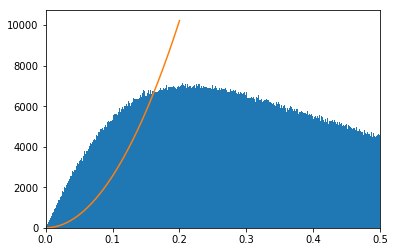

In [233]:
plt.hist(dist_coord, bins = bins_d, range = (d_min, d_max))
plt.xlim(0,0.5)
d_linspace = np.linspace(d_min, epsilon, bins, endpoint = False)
plt.plot(d_linspace, n(d_linspace, n_0))

Calculate the Pearson Chi Square statistic